# Diabetes Prediction - Introduction

Build some machine learning model to **classify** patients of diabetes.

The objectives of this project are:
* Learn about classification model.

* Learn fundamentals of data engineering.

* Learn to deploy ML model using Flask

Models used in this project:
* Logistic Regression

* Decision Tree

* Random Forest

* SVM

## Libraries Import

In [104]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Overview

In [208]:
data = pd.read_csv("/Users/toan/Downloads/diabetes_01_health_indicators_BRFSS2015 2.csv")

In [209]:
pd.set_option('display.max_columns', None)

In [210]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [211]:
data.shape

(253680, 22)

In [212]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [213]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [215]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Unique value count']).transpose()

,Unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


-	**Diabetes_012**: kết quả bệnh tiểu đường

-	**HighBP**: huyết áp cao

-	**HighChol**: nồng độ cholesterol cao

-	**CholCheck**: thời gian kiểm tra nồng độ cholesterol

-	**BMI**: chỉ số BMI

-	**Smoker**: người hút thuốc

-	**Stroke**: đột quỵ

-	**HeartDiseaseorAttack**: bệnh tim mạch vành hoặc nhồi máu cơ tim

-	**PhysActivity**: hoạt động thể chất trong 30 ngày qua không kể đến công việc
-	**Fruits**: ăn trái cây 1 hoặc nhiều lần trong ngày
-	**Veggies**: ăn rau 1 hoặc nhiều lần trong ngày
-	**HvyAlcoholConsump**: người nghiện rượu nặng (đàn ông trưởng thành uống hơn 14 ly mỗi tuần và 7 ly mỗi tuần đối với phụ nữ trưởng thành)
-	**AnyHealthcare**: có bất kỳ loại bảo hiểm chăm sóc sức khoẻ nào
-	**NoDocbcCost**: có thời điểm nào trong 12 tháng qua cần đi gặp bác sĩ nhưng không đủ chi phí 
-	**GenHlth**: tổng quan sức khoẻ của bạn theo thang từ 1 đến 5
-	**MentHlth**: sức khoẻ tinh thần của bạn như căng thẳng, trầm cảm,.. trong 30 ngày gần đây.
-	**PhysHlth**: sức khoẻ thể chất của bạn bao gồm chấn thương, bệnh tật,.. trong 30 ngày gần đây.
-	**DiffWalk**: có cảm thấy khó khăn khi đi bộ hay leo cầu thang
-	**Sex**: giới tính
-	**Age**: độ tuổi
-	**Education**: độ tuổi
-	**Income**: mức thu nhập


## Preprocessing


In [216]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [217]:
data.duplicated().sum()

23899

In [218]:
data.drop_duplicates(inplace = True)

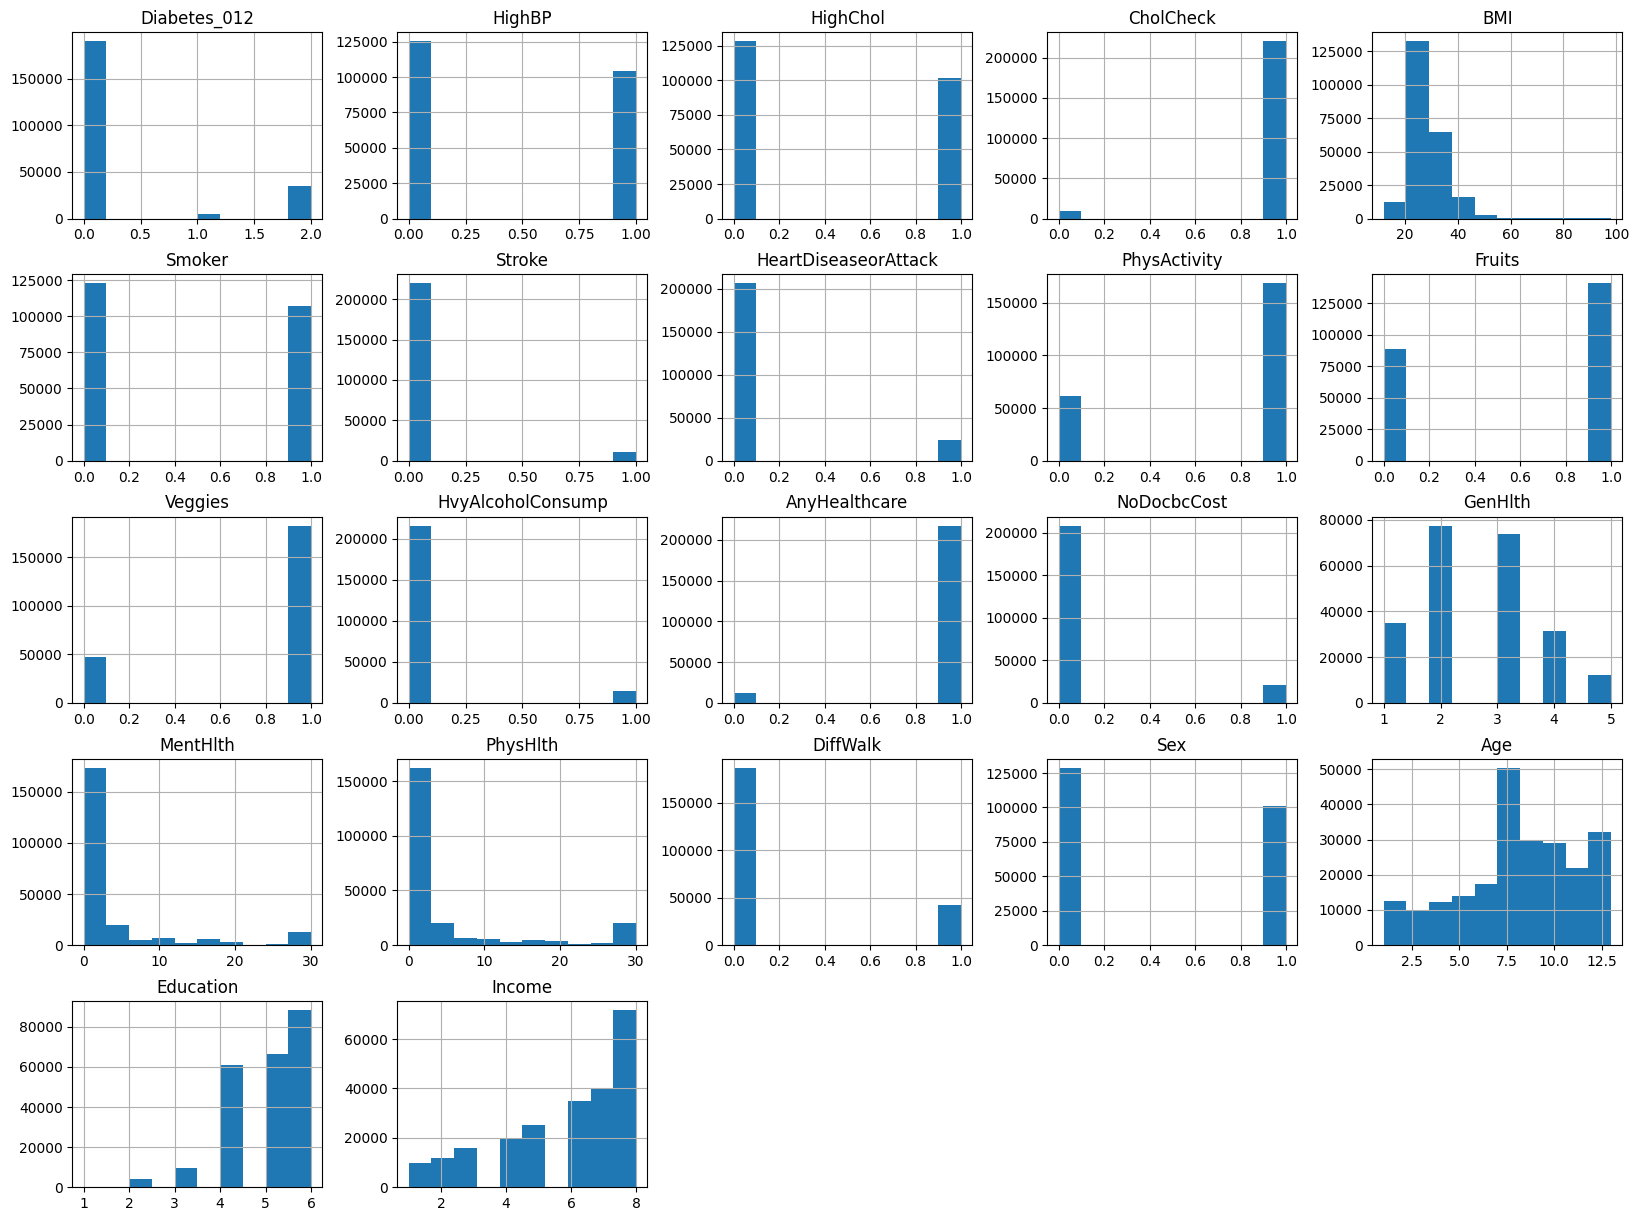

In [219]:
data.hist(figsize=(20,15));

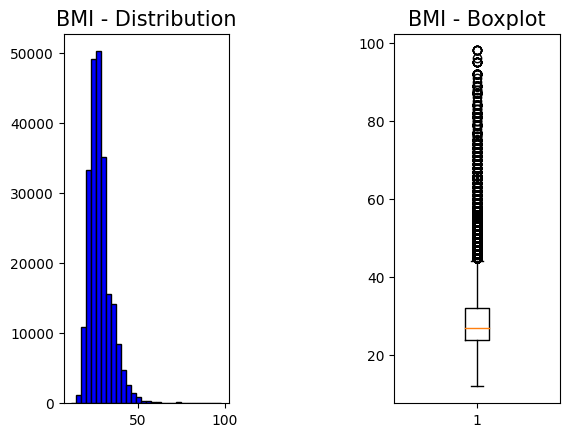

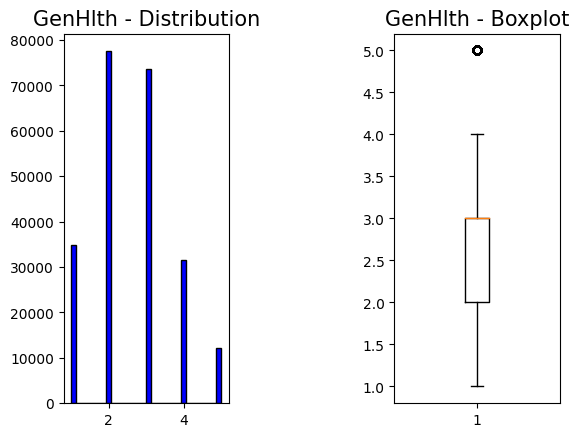

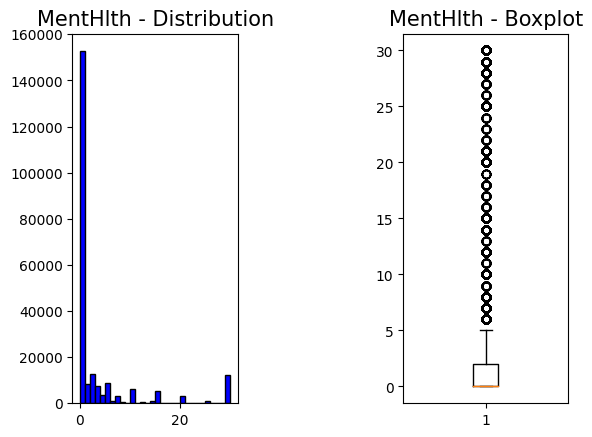

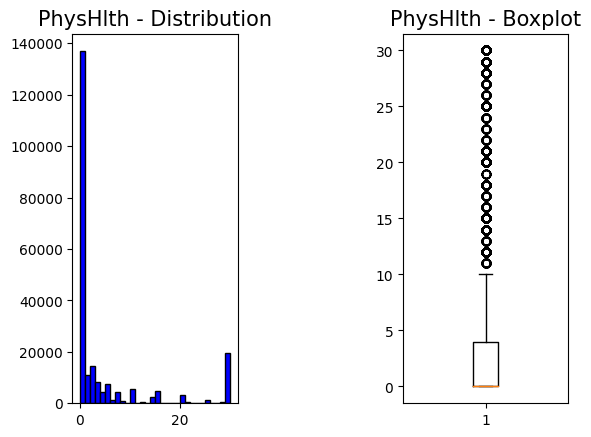

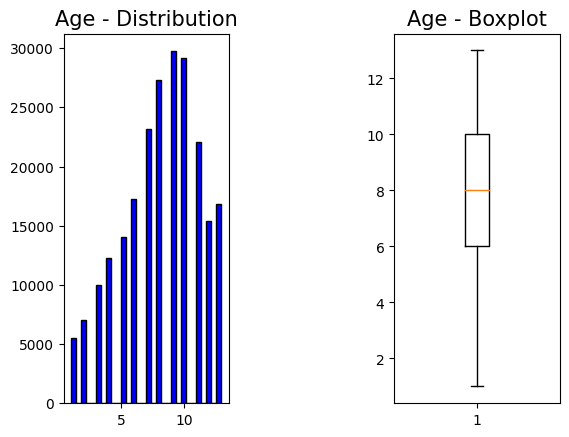

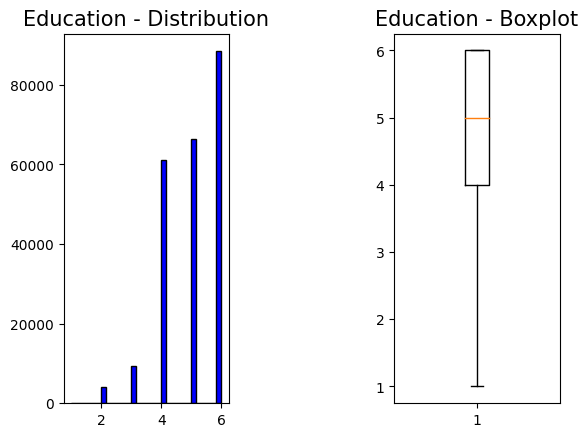

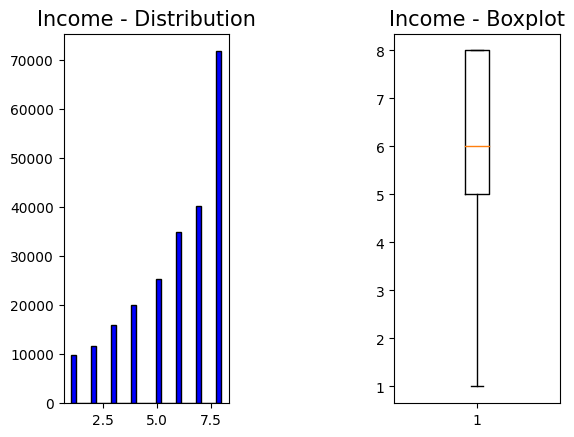

In [220]:
columns_to_plot = data[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']]

for column in columns_to_plot:
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Distribution", fontsize=15)
    plt.hist(data[column], bins=30, color='blue', edgecolor='black')


    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Boxplot", fontsize=15)
    plt.boxplot(data[column])

    plt.subplots_adjust(wspace=1)
    plt.show()  

In [221]:
data[(data["BMI"]>50) & (data["BMI"]<=100)].value_counts()

Diabetes_012  HighBP  HighChol  CholCheck  BMI   Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age   Education  Income
0.0           0.0     0.0       0.0        51.0  0.0     0.0     0.0                   0.0           0.0     1.0      0.0                1.0            0.0          2.0      0.0       0.0       0.0       0.0  6.0   6.0        6.0       1
1.0           1.0     0.0       1.0        81.0  1.0     0.0     1.0                   1.0           1.0     1.0      0.0                1.0            0.0          2.0      0.0       0.0       0.0       1.0  12.0  5.0        7.0       1
                      1.0       1.0        55.0  0.0     0.0     0.0                   0.0           1.0     1.0      1.0                0.0            1.0          4.0      10.0      30.0      0.0       1.0  4.0   4.0        4.0       1
                                                     

In [222]:
data[(data["BMI"]>50) & (data["BMI"]<=100)].median()

Diabetes_012             0.0
HighBP                   1.0
HighChol                 0.0
CholCheck                1.0
BMI                     56.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 3.0
DiffWalk                 1.0
Sex                      0.0
Age                      7.0
Education                5.0
Income                   5.0
dtype: float64

In [223]:
data.loc[(data['BMI'] > 50) & (data['BMI'] < 100), 'BMI'] = 56

{'whiskers': [<matplotlib.lines.Line2D at 0x29f08e320>,
 'caps': [<matplotlib.lines.Line2D at 0x29f08e860>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f08e080>],
 'medians': [<matplotlib.lines.Line2D at 0x29f08eda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f08f040>],
 'means': []}

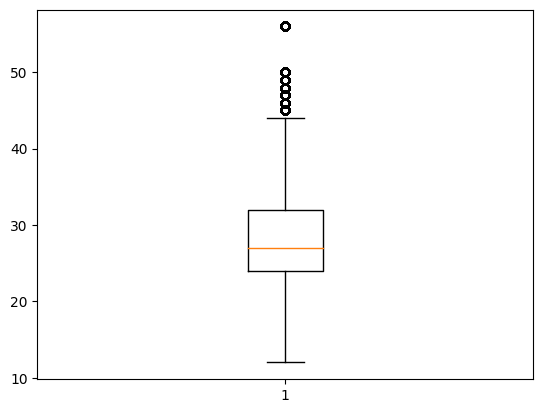

In [224]:
plt.boxplot(data['BMI'])

## EDA

Text(0.5, 1.0, 'correlation of feature')

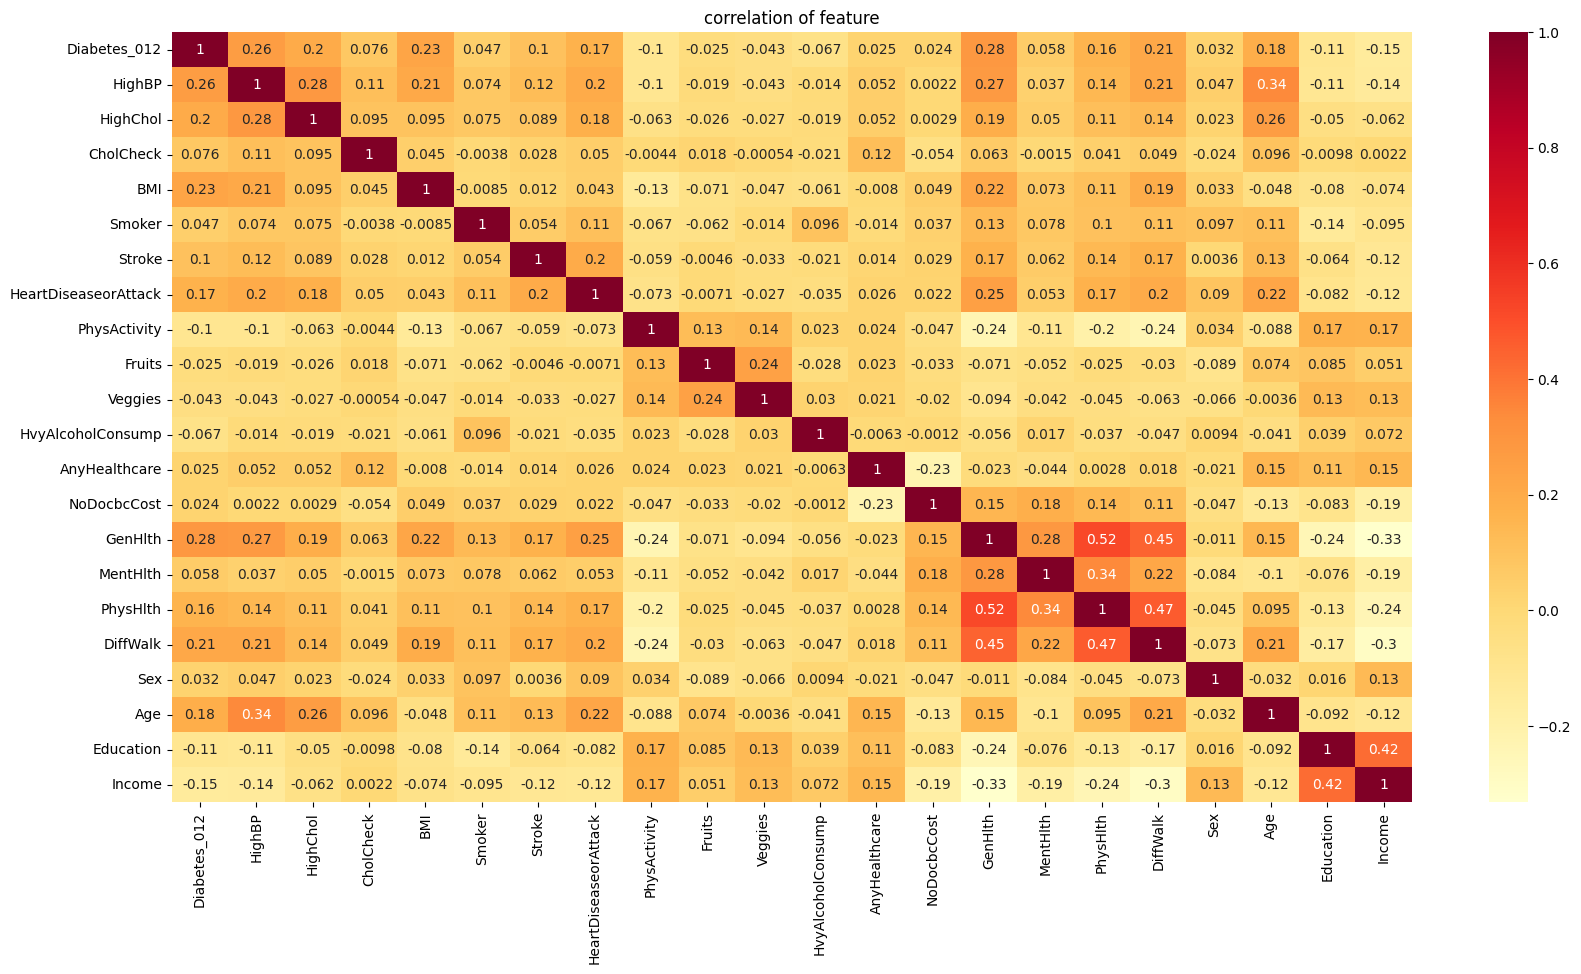

In [225]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [226]:
data2 = data.copy()

In [227]:
data2["Diabetes_012"]= data2["Diabetes_012"].replace({0:"No Diabetes",1:"Prediabetes", 2:"Diabetes"})

In [125]:
data2["Diabetes_012"].value_counts()

Diabetes_012
No Diabetes    190055
Diabetes        35097
Prediabetes      4629
Name: count, dtype: int64

Text(0.5, 1.0, 'Value count of Diabetes_012 ')

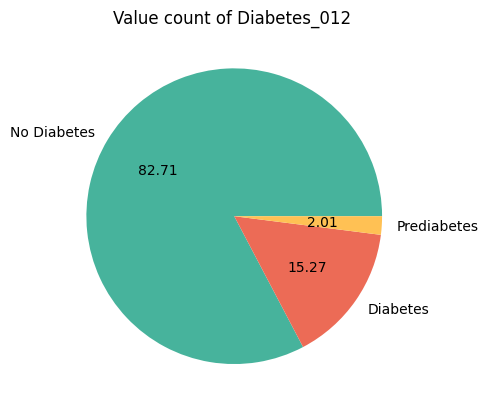

In [126]:
plt.pie(data2["Diabetes_012"].value_counts() , colors=['#47B39C', '#EC6B56', '#FFC154'] ,labels =["No Diabetes", "Diabetes", "Prediabetes"] ,autopct='%.02f' );
plt.title('Value count of Diabetes_012 ')

In [127]:
data2["HighBP"].value_counts()

HighBP
0.0    125359
1.0    104422
Name: count, dtype: int64

Text(0.5, 1.0, 'Value count of HighBP ')

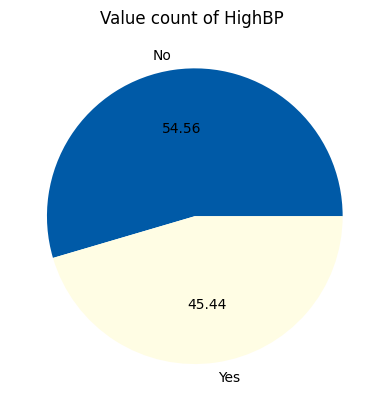

In [128]:
plt.pie(data2["HighBP"].value_counts() , colors=['#005AA7', '#FFFDE4'], labels =["No", "Yes"] ,autopct='%.02f' );
plt.title('Value count of HighBP ')

In [129]:
data2["HighBP"]= data2["HighBP"].replace({0:"No",1:"Yes"})

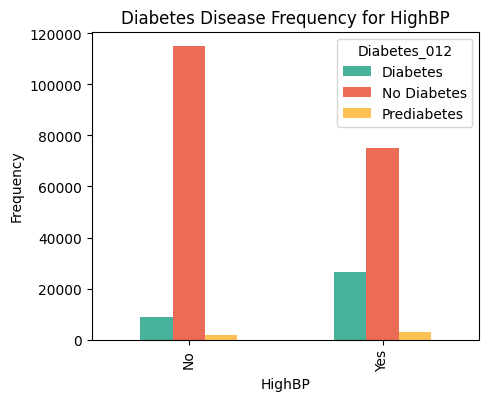

In [130]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.HighBP,data2.Diabetes_012).plot(kind="bar",color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

In [203]:
data2["HighChol"].value_counts()

HighChol
No     128273
Yes    101508
Name: count, dtype: int64

Text(0.5, 1.0, 'Value count of HighChol')

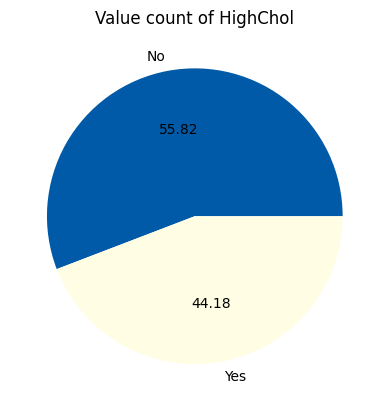

In [131]:
plt.pie(data["HighChol"].value_counts() , colors=['#005AA7', '#FFFDE4'], labels =["No", "Yes"] ,autopct='%.02f' );
plt.title('Value count of HighChol')

In [132]:
data2["HighChol"]= data2["HighChol"].replace({0:"No",1:"Yes"})

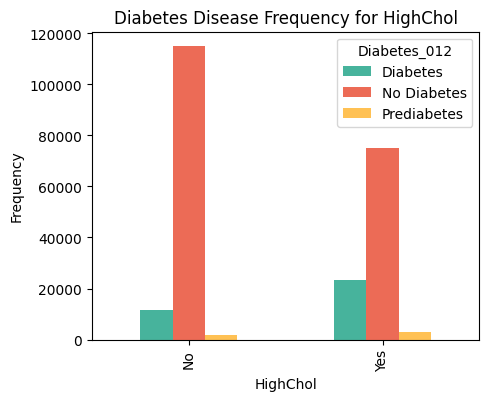

In [205]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.HighChol,data2.Diabetes_012).plot(kind="bar",color=colors ,figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation among HighBP ,HighChol and Diabetes')

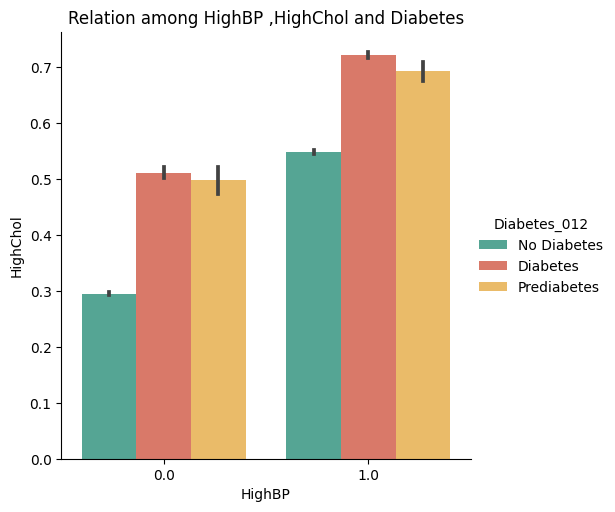

In [229]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
sns.catplot(x="HighBP" , y ="HighChol" , data = data2 , hue="Diabetes_012" , palette=colors , kind="bar" );
plt.title("Relation among HighBP ,HighChol and Diabetes")

In [135]:
data2["PhysActivity"]= data2["PhysActivity"].replace({0:"No",1:"Yes"})

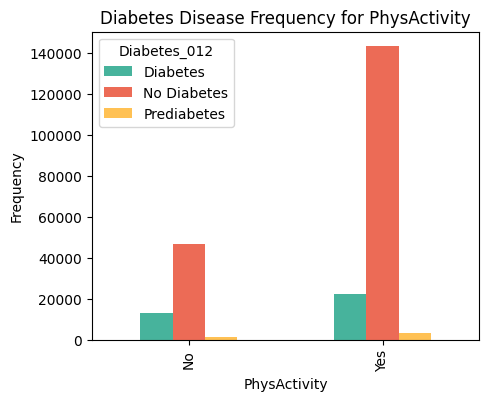

In [136]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.PhysActivity,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

In [137]:
data2["Veggies"]= data2["Veggies"].replace({0:"No",1:"Yes"})

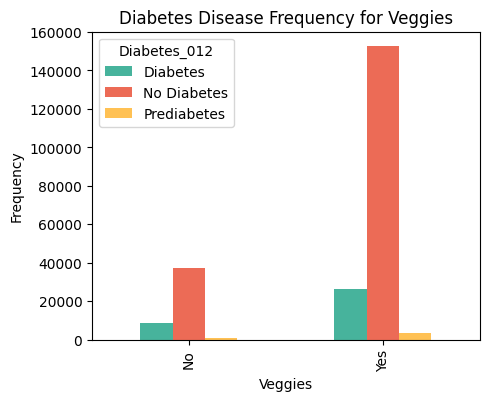

In [138]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.Veggies,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

In [139]:
data2["DiffWalk"]= data2["DiffWalk"].replace({0:"No",1:"Yes"})

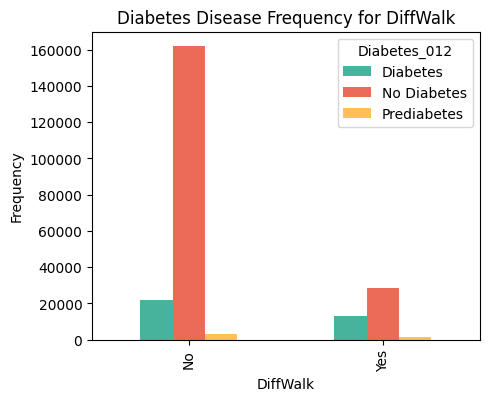

In [140]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.DiffWalk,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for DiffWalk')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

In [233]:
data2['Sex'].value_counts()

Sex
female    128854
male      100927
Name: count, dtype: int64

Text(0.5, 1.0, 'Value count of Sex')

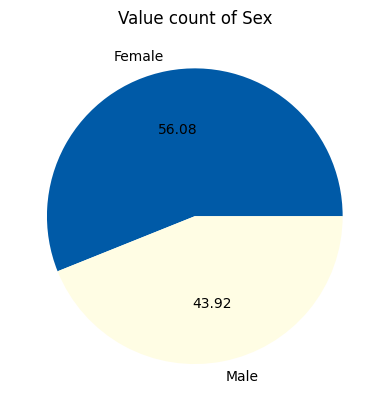

In [235]:
plt.pie(data["Sex"].value_counts() , colors=['#005AA7', '#FFFDE4'], labels =["Female", "Male"] ,autopct='%.02f' );
plt.title('Value count of Sex')

In [232]:
data2["Sex"]= data2["Sex"].replace({0:"female",1:"male"})

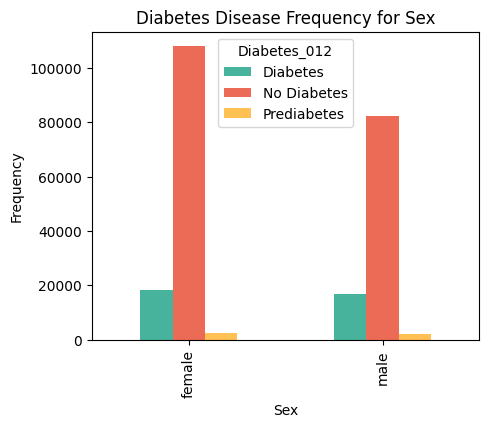

In [142]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.Sex,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

In [143]:
data2["CholCheck"]= data2["CholCheck"].replace({0:"No",1:"Yes"})

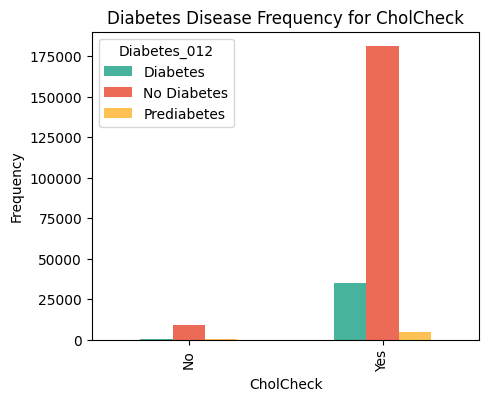

In [144]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.CholCheck,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for CholCheck')
plt.xlabel("CholCheck")
plt.ylabel('Frequency')
plt.show()

In [145]:
data2["AnyHealthcare"]= data2["AnyHealthcare"].replace({0:"No",1:"Yes"})

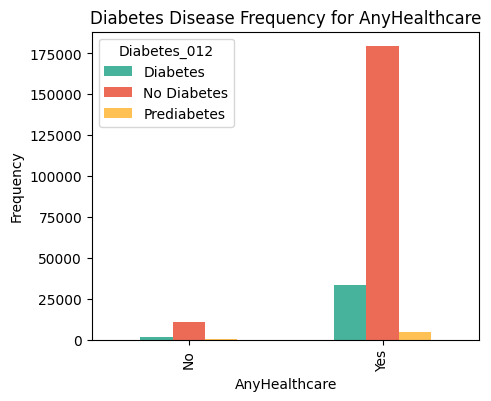

In [146]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.AnyHealthcare,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for AnyHealthcare')
plt.xlabel("AnyHealthcare")
plt.ylabel('Frequency')
plt.show()

In [147]:
data2["NoDocbcCost"]= data2["NoDocbcCost"].replace({0:"No",1:"Yes"})

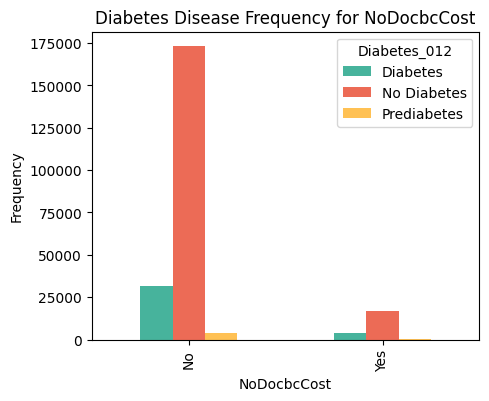

In [148]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.NoDocbcCost,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(5,4))

plt.title('Diabetes Disease Frequency for NoDocbcCost')
plt.xlabel("NoDocbcCost")
plt.ylabel('Frequency')
plt.show()

In [149]:
data2["Age"]= data2["Age"].replace({1:"Age 18 - 24", 2: "Age 25 to 29", 3: "Age 30 to 34", 4: "Age 35 to 39", 5: "Age 40 to 44", 6: "Age 45 to 49", 7: "Age 50 to 54", 8: "Age 55 to 59", 9: "Age 60 to 64", 10: "Age 65 to 69", 11: "Age 70 to 74", 12: "Age 75 to 79", 13: "Age 80 or older"})

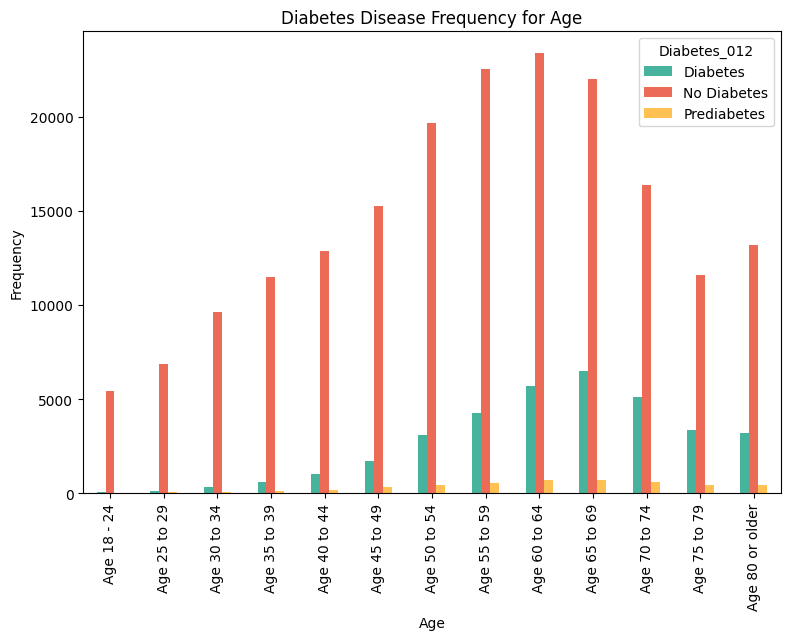

In [150]:
colors = ['#47B39C', '#EC6B56', '#FFC154']
pd.crosstab(data2.Age,data2.Diabetes_012).plot(kind="bar", color=colors,figsize=(9,6))

plt.title('Diabetes Disease Frequency for Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

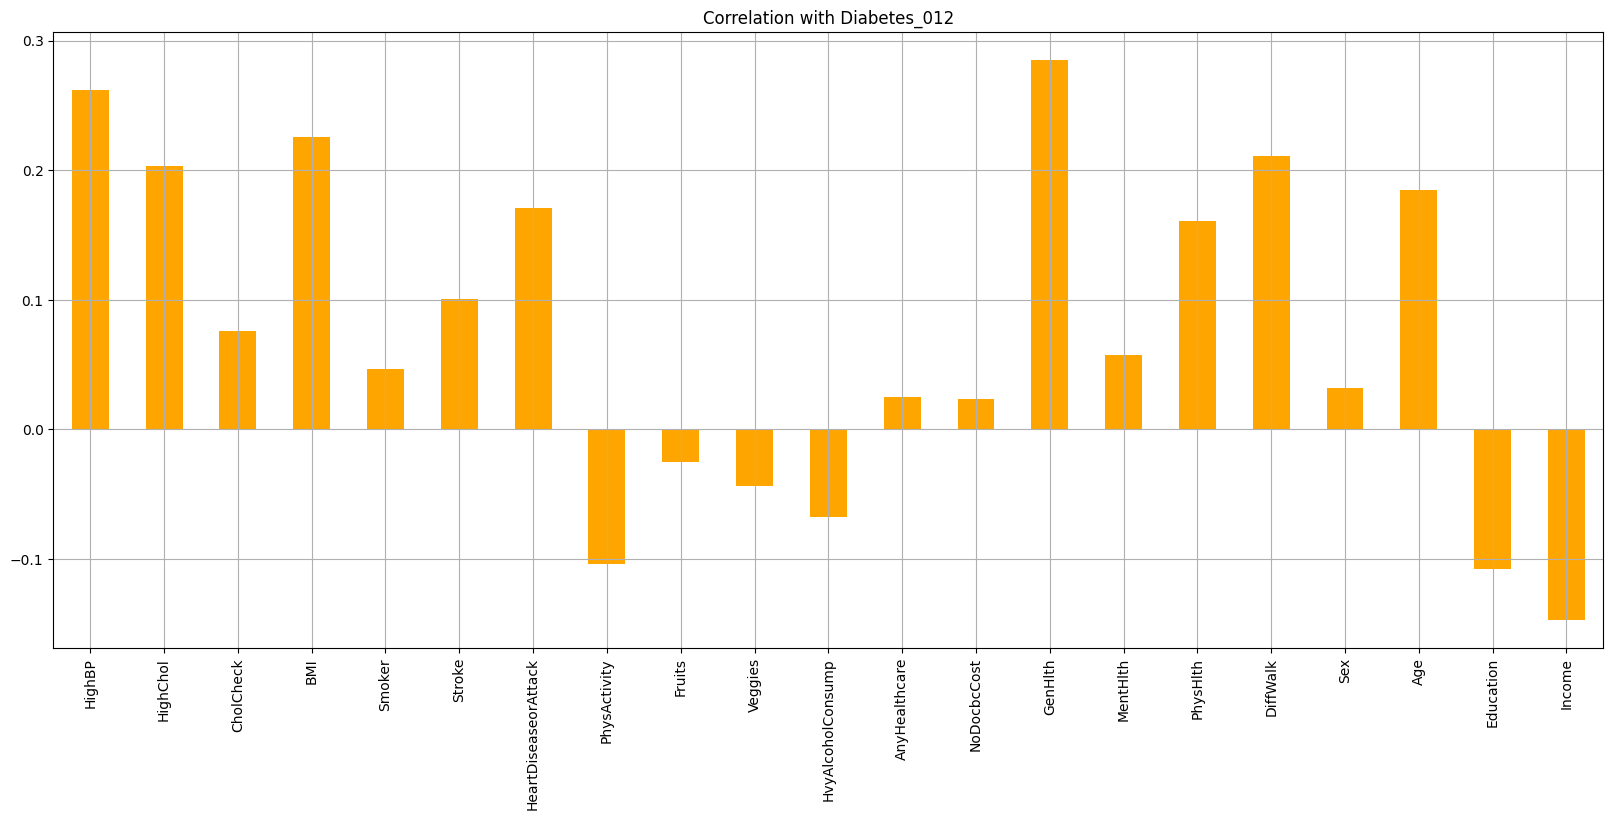

In [236]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_012",color="Orange");

## Feature selection

In [237]:
data3 = data.copy()

In [238]:
X = data3.iloc[:,1:]
Y = data3.iloc[:,0]

In [239]:
BestFeatures = SelectKBest(score_func=chi2, k=all)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([df_columns,df_scores],axis=1)       
f_Scores.columns = ['Feature','Score']

print(f_Scores.nlargest(21,'Score'))

                 Feature          Score
15              PhysHlth  103705.813420
3                    BMI   16813.886097
14              MentHlth   13499.056578
18                   Age    9400.408945
0                 HighBP    8633.562752
16              DiffWalk    8310.280494
13               GenHlth    8142.602678
6   HeartDiseaseorAttack    6015.661944
1               HighChol    5381.985473
20                Income    3748.254712
5                 Stroke    2212.060848
10     HvyAlcoholConsump     973.676965
7           PhysActivity     656.187604
19             Education     537.068918
4                 Smoker     268.924145
12           NoDocbcCost     163.138397
17                   Sex     136.998866
9                Veggies      89.554915
8                 Fruits      57.666728
2              CholCheck      54.155676
11         AnyHealthcare       7.883473


In [240]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "NoDocbcCost"]

In [241]:
data3.drop(colomns , axis= 1 ,inplace=True)

In [242]:
data3

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,1.0


## Dealing imbalanced data

In [243]:
data = data.drop(data[data['Diabetes_012'] == 1].index)
data3 = data3.drop(data3[data3['Diabetes_012'] == 1].index)

In [244]:
data['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
Name: count, dtype: int64

### Data with feature selection

In [245]:
X=data3.drop("Diabetes_012",axis=1)
y=data3["Diabetes_012"]

In [246]:
X.shape, y.shape

((225152, 15), (225152,))

In [247]:
nrm = NearMiss(version = 1 , n_neighbors = 11)

X_resampled, y_resampled= nrm.fit_resample(X, y)

In [248]:
X_resampled.shape , y_resampled.shape

((70194, 15), (70194,))

In [249]:
data['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
Name: count, dtype: int64

In [164]:
X_train , X_test , y_train , y_test = train_test_split(X_resampled, y_resampled, test_size=0.2 , random_state=52)

### Data without feature selection

In [165]:
A=data.drop("Diabetes_012",axis=1)
b=data["Diabetes_012"]

In [166]:
A.shape, b.shape

((225152, 21), (225152,))

In [167]:
nrm = NearMiss(version = 1 , n_neighbors = 11)
A_resampled, b_resampled= nrm.fit_resample(A, b)

In [168]:
A_resampled.shape, b_resampled.shape

((70194, 21), (70194,))

In [169]:
A_train , A_test , b_train , b_test = train_test_split(A_resampled, b_resampled, test_size=0.2 , random_state=52)

## Data Scaling

In [170]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [171]:
A_train = scalar.fit_transform(A_train)
A_test = scalar.fit_transform(A_test)

# Model 
* X_train : data with feature selection

* A_train: data without feature selection

## Logistic Regression X_train

In [195]:
model = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'max_iter': [500, 700, 1000, 1500],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2'}


In [266]:
LRclassifier = LogisticRegression(C=1, class_weight=None, max_iter=500, penalty='l2')
LRclassifier.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=500)

In [267]:
y_pred = LRclassifier.predict(X_test)

print('Training set score: {:.4f}'.format(LRclassifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(LRclassifier.score(X_test, y_test)))

Training set score: 0.8464
Test set score: 0.8486


In [268]:
print(classification_report(y_test, y_pred))

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      7068
         2.0       0.91      0.77      0.84      6971

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039

Logistic Regression accuracy is: 84.86%


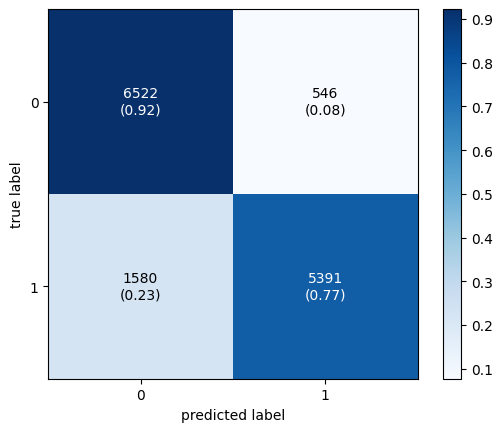

In [269]:
cm_lg1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm_lg1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Logistic Regression A_train

In [200]:
model = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'max_iter': [500, 700, 1000, 1500],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(A_train, b_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2'}


In [176]:
LRclassifier = LogisticRegression(C=1, class_weight=None, max_iter=500, penalty='l2')
LRclassifier.fit(A_train, b_train)

LogisticRegression(C=1, max_iter=500)

In [177]:
y_pred = LRclassifier.predict(A_test)

print('Training set score: {:.4f}'.format(LRclassifier.score(A_train, b_train)))
print('Test set score: {:.4f}'.format(LRclassifier.score(A_test, b_test)))

Training set score: 0.8510
Test set score: 0.8514


In [178]:
print(classification_report(b_test, y_pred))

LRAcc = accuracy_score(y_pred,b_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      7068
         2.0       0.91      0.78      0.84      6971

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039

Logistic Regression accuracy is: 85.14%


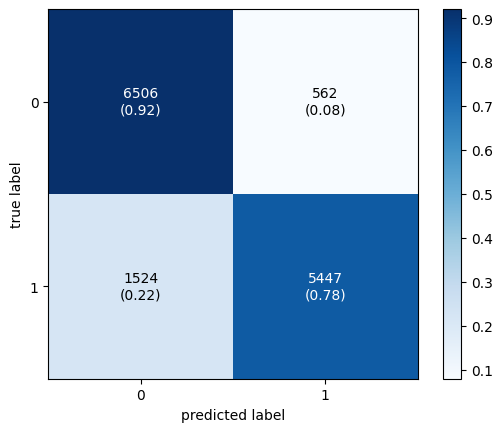

In [179]:
cm_lg2 = confusion_matrix(b_test,y_pred)
plot_confusion_matrix(conf_mat=cm_lg2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Decision Tree X_train

In [205]:
model = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 5, 10, 15], 
              'max_leaf_nodes': [None, 10, 20, 30],}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 15, 'max_leaf_nodes': None}
Best Score:  0.8500222598165792


In [206]:

param_dist = {'max_depth': [None] + list(np.arange(5, 30, 1)),
              'max_leaf_nodes': [None] + list(np.arange(10, 40, 5))}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'max_leaf_nodes': None, 'max_depth': 15}
Best Score:  0.8501825304959487


In [180]:
DTclassifier = DecisionTreeClassifier(max_depth=15, max_leaf_nodes=None)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [181]:
y_pred=DTclassifier.predict(X_test)

print('Training set score: {:.4f}'.format(DTclassifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTclassifier.score(X_test, y_test)))

Training set score: 0.8771
Test set score: 0.8516


In [182]:
print(classification_report(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87      7068
         2.0       0.94      0.75      0.83      6971

    accuracy                           0.85     14039
   macro avg       0.87      0.85      0.85     14039
weighted avg       0.87      0.85      0.85     14039

Decision Tree accuracy is: 85.16%


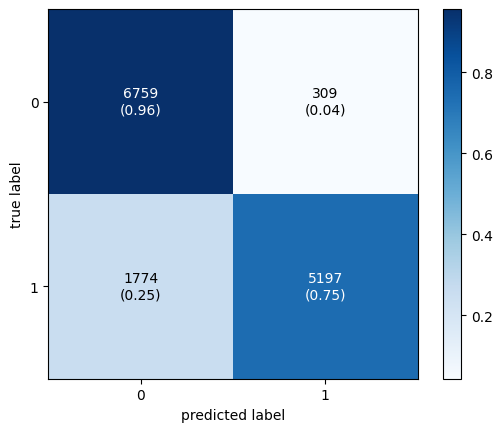

In [183]:
cm_dt1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm_dt1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Decision Tree A_train

In [211]:
model = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 5, 10, 15], 
              'max_leaf_nodes': [None, 10, 20, 30],}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(A_train, b_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 10, 'max_leaf_nodes': None}
Best Score:  0.845142908022438


In [212]:
param_dist = {'max_depth': [None] + list(np.arange(5, 30, 1)),
              'max_leaf_nodes': [None] + list(np.arange(10, 40, 5))}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(A_train, b_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'max_leaf_nodes': 35, 'max_depth': 9}
Best Score:  0.8449648294898051


In [184]:
DTclassifier = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=None)
DTclassifier.fit(A_train, b_train)

DecisionTreeClassifier(max_depth=10)

In [185]:
y_pred=DTclassifier.predict(A_test)

print('Training set score: {:.4f}'.format(DTclassifier.score(A_train, b_train)))
print('Test set score: {:.4f}'.format(DTclassifier.score(A_test, b_test)))

Training set score: 0.8532
Test set score: 0.8481


In [186]:
print(classification_report(b_test, y_pred))

DTAcc = accuracy_score(y_pred,b_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      7068
         2.0       0.94      0.74      0.83      6971

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039

Decision Tree accuracy is: 84.81%


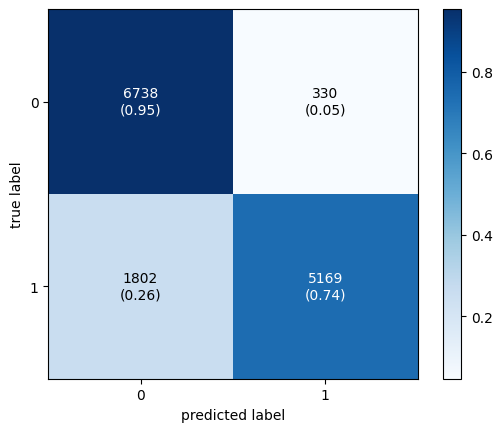

In [187]:
cm_dt2 = confusion_matrix(b_test,y_pred)
plot_confusion_matrix(conf_mat=cm_dt2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## SVM X_train

In [196]:
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Các tham số tối ưu:", grid_search.best_params_)

Các tham số tối ưu: {'C': 10, 'kernel': 'rbf'}


In [256]:
svm = SVC(kernel='rbf', C=10)
svm.fit(X_train, y_train)

SVC(C=10)

In [257]:
y_pred=svm.predict(X_test)

print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))

Training set score: 0.8723
Test set score: 0.8687


In [258]:
print(classification_report(y_test, y_pred))

SVMAcc = accuracy_score(y_pred,y_test)
print('Support Vector Machine accuracy is: {:.2f}%'.format(SVMAcc*100))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      7068
         2.0       0.95      0.78      0.85      6971

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.87     14039
weighted avg       0.88      0.87      0.87     14039

Support Vector Machine accuracy is: 86.87%


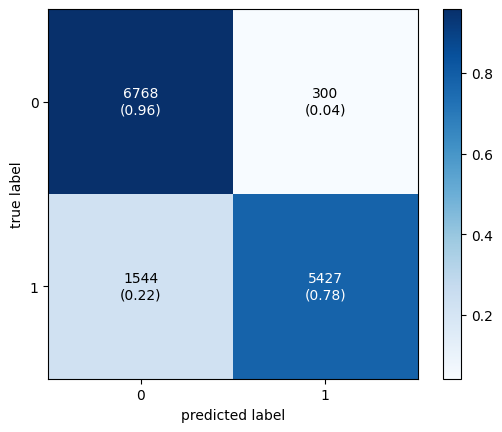

In [259]:
cm_svm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm_svm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## SVM A_train

In [201]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(A_train, b_train)

print("Các tham số tối ưu:", grid_search.best_params_)

Các tham số tối ưu: {'C': 10, 'kernel': 'rbf'}


In [255]:
svm = SVC(kernel='rbf', C=1.0)
svm.fit(A_train, b_train)

SVC()

In [193]:
y_pred=svm.predict(A_test)

print('Training set score: {:.4f}'.format(svm.score(A_train, b_train)))

print('Test set score: {:.4f}'.format(svm.score(A_test, b_test)))

Training set score: 0.8692
Test set score: 0.8668


In [194]:
print(classification_report(y_test, y_pred))

SVMAcc = accuracy_score(y_pred,y_test)
print('Support Vector Machine accuracy is: {:.2f}%'.format(SVMAcc*100))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      7068
         2.0       0.95      0.77      0.85      6971

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.87     14039
weighted avg       0.88      0.87      0.87     14039

Support Vector Machine accuracy is: 86.68%


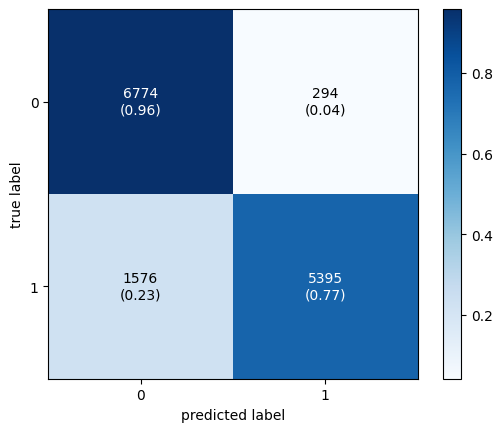

In [195]:
cm_svm2 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm_svm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Random Forest X_train

In [86]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None] + list(np.arange(2, 20, 2))
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters: {'max_depth': 16, 'n_estimators': 30}
Best Score:  0.8626124874597192


In [260]:
rf = RandomForestClassifier(max_depth=16 ,n_estimators =30, random_state=42 )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=30, random_state=42)

In [261]:
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.8910
Test set score: 0.8657


In [264]:
print(classification_report(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      7068
         2.0       0.95      0.77      0.85      6971

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.86     14039
weighted avg       0.88      0.87      0.86     14039

Random Forest accuracy is: 86.57%


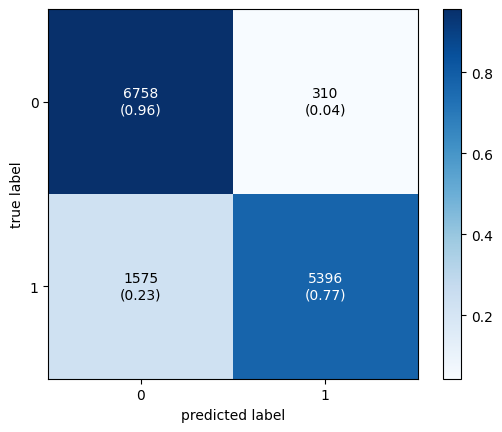

In [265]:
cm_rd1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm_rd1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Random Forest A_train

In [91]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None] + list(np.arange(2, 20, 2))
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(A_train, b_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters: {'max_depth': 16, 'n_estimators': 30}
Best Score:  0.8614371158684464


In [92]:
rf = RandomForestClassifier(max_depth=16 ,n_estimators =30, random_state=42 )
rf.fit(A_train, b_train)

RandomForestClassifier(max_depth=16, n_estimators=30, random_state=42)

In [93]:

y_pred=rf.predict(A_test)

print('Training set score: {:.4f}'.format(rf.score(A_train, b_train)))

print('Test set score: {:.4f}'.format(rf.score(A_test, b_test)))

Training set score: 0.8941
Test set score: 0.8627


In [94]:
print(classification_report(b_test, y_pred))

RFAcc = accuracy_score(y_pred,b_test)
print('RF accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87      7068
         2.0       0.94      0.77      0.85      6971

    accuracy                           0.86     14039
   macro avg       0.88      0.86      0.86     14039
weighted avg       0.87      0.86      0.86     14039

RF accuracy is: 86.27%


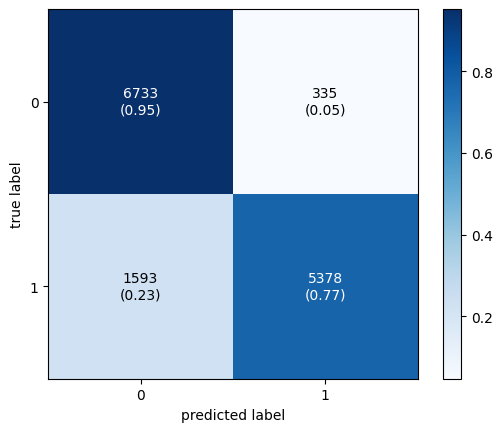

In [95]:
cm1 = confusion_matrix(b_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

lg-x: 85.03/ lg-res:84.79
dt-x: 83.18/ dt-res: 85.15
svc
rd-x: 83.26/ rd-res: 86.69

## Compare accuracy result

In [270]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, SVMAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Support Vector Machine,86.865161
3,Random Forest,86.573118
0,Logistic Regression,84.856471
1,Decision Tree,84.813733


## Export Model

In [271]:
import pickle
pickle.dump(svm,open('diabetes_classifier.pkl','wb'))
model=pickle.load(open('diabetes_classifier.pkl','rb'))